In [1]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import display, Latex

form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}

exec(open('functions.py').read())

In [2]:
AND=" and ";   OR=" or ";   NOT=" not ";   cand0=" (__candidate__==0) ";   mycand=" (__candidate__==bBest) "
BpBmcut="( decayModeID==3005530 )";        B0B0cut="( decayModeID>=3005531 and decayModeID<=3005534 )"
roecuts="( nROE_Ch==0 and Eextra_ROE<1 )"
y4scuts="( cosBY0<1.1 and cosBY0>-1.9 and cosBY1<1.1 and cosBY1>-1.9 and (B0_decayModeID<500 or B1_decayModeID<500) )"
y4scuts_new = "( cosBY0<1.3 and cosBY0>-3.2 and cosBY1<1.1 and cosBY1>-1.9 )"
pipcut0="( (abs(pi4_B0_InvM-0.1395)<0.001 and pi4_1_B0_PDG!=22)"
pipcut1="( (abs(pi4_B1_InvM-0.1395)<0.001 and pi4_1_B1_PDG!=22)"
pipcut = '('+pipcut0 +OR+ pipcut1+')'
piptrue= '(('+pipcut0+AND+'(pi4_B0_isSignal==1))' +OR+ '('+pipcut1+AND+'(pi4_B1_isSignal==1))'+')'
pi0cut0="(abs(pi4_B0_InvM-0.135)<0.025 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0cut1="(abs(pi4_B1_InvM-0.135)<0.025 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0cut = '('+pi0cut0 +OR+ pi0cut1+')'
pi0wide0="(abs(pi4_B0_InvM-0.135)<0.050 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0wide1="(abs(pi4_B1_InvM-0.135)<0.050 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0wide = '('+pi0wide0 +OR+ pi0wide1+')'
pi0true0= '('+pi0wide0 +AND+ '(pi4_B0_isSignal==1)'+')'
pi0true1= '('+pi0wide1 +AND+ '(pi4_B1_isSignal==1)'+')'
pi0true = '('+pi0true0 +OR+ pi0true1+')'
pi0cutE0= '('+pi0cut0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0cutE1= '('+pi0cut1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0cutE = '('+pi0cutE0 +OR+ pi0cutE1+')'
pi0wideE0= '('+pi0wide0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0wideE1= '('+pi0wide1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0wideE = '('+pi0wideE0 +OR+ pi0wideE1+')'
pi0trueE0= '('+pi0true0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0trueE1= '('+pi0true1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0trueE = '('+pi0trueE0 +OR+ pi0trueE1+')'
etacut0 ="(abs(pi4_B0_InvM-0.547)<0.055 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etacut1 ="(abs(pi4_B1_InvM-0.547)<0.055 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etacut  = '('+etacut0 +OR+ etacut1+')'
etawide0="(abs(pi4_B0_InvM-0.547)<0.120 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etawide1="(abs(pi4_B1_InvM-0.547)<0.120 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etawide = '('+etawide0 +OR+ etawide1+')'
etatrue0= '('+etawide0 +AND+ '(pi4_B0_isSignal==1)'+')'
etatrue1= '('+etawide1 +AND+ '(pi4_B1_isSignal==1)'+')'
etatrue = '('+etatrue0 +OR+ etatrue1+')'

Bprec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1650)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1650)<60))"
B0rec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1450)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1450)<60))"


# format of labels
# label including this form2 will have these properties
form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}


mcNBB = 182500 * 2. *3000;   mclumi = mcNBB / 1100000.
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1')

Number of BB events (sum of B+B- and B0B0) = 1.095e+09
MC sample equivalent to 995.45 fb-1


In [3]:
# reconstructed eta modes plus etaSB
l_eta_Bp = [1600,1700,2600,2700]
eta_Bp = list(i+1 for i in l_eta_Bp) + l_eta_Bp

l_eta_B0 = [1400,1500,2400,2500]
eta_B0 = list(i+1 for i in l_eta_B0) + l_eta_B0

In [4]:
data = pd.read_pickle('semileptonic_Bdecay_data.pkl')

In [5]:
data

__experiment__  __run__  __event__  \
rec_charged gen_charged 0                 1003        0    8640457   
                        1                 1003        0    8640457   
                        2                 1003        0    8640457   
                        12                1003        0   12624230   
                        13                1003        0   12624230   
...                                        ...      ...        ...   
rec_mixed   gen_mixed   431043            1003        0     308753   
                        431044            1003        0     308753   
                        431045            1003        0    1175564   
                        431046            1003        0    1175564   
                        431048            1003        0    1175564   

                                __production__  __candidate__  \
rec_charged gen_charged 0                24816              0   
                        1                24816              1   
                        2                24816              2   
                        12               24816              0   
                        13               24816              1   
...                                        ...            ...   
rec_mixed   gen_mixed   431043           25056              7   
                        431044           25056              8   
                        431045           25056              0   
                        431046           25056              1   
                        431048           25056              3   

                                __ncandidates__  __weight__       Ecms  \
rec_charged gen_charged 0                     3         1.0  10.579557   
                        1                     3         1.0  10.579557   
                        2                     3         1.0  10.579557   
                        12                    9         1.0  10.579557   
                        13                    9         1.0  10.579557   
...                                         ...         ...        ...   
rec_mixed   gen_mixed   431043                9         1.0  10.579557   
                        431044                9         1.0  10.579557   
                        431045                9         1.0  10.579557   
                        431046                9         1.0  10.579557   
                        431048                9         1.0  10.579557   

                                aBminusMode  aBplusMode  ...  MCGenPDG_45  \
rec_charged gen_charged 0         -101002.0      1021.0  ...          NaN   
                        1         -101002.0      1021.0  ...          NaN   
                        2         -101002.0      1021.0  ...          NaN   
                        12        -101001.0      1022.0  ...          NaN   
                        13        -101001.0      1022.0  ...          NaN   
...                                     ...         ...  ...          ...   
rec_mixed   gen_mixed   431043        -99.0       -99.0  ...          NaN   
                        431044        -99.0       -99.0  ...          NaN   
                        431045        -99.0       -99.0  ...          NaN   
                        431046        -99.0       -99.0  ...          NaN   
                        431048        -99.0       -99.0  ...          NaN   

                                MCGenMothIndex_45  MCGenPDG_46  \
rec_charged gen_charged 0                     NaN          NaN   
                        1                     NaN          NaN   
                        2                     NaN          NaN   
                        12                    NaN          NaN   
                        13                    NaN          NaN   
...                                           ...          ...   
rec_mixed   gen_mixed   431043                NaN          NaN   
                        431044                NaN          NaN   
  

In [6]:
pd.read_pickle('dataset_Abid.pkl')

__experiment__  __run__  __event__  __production__  __candidate__  \
0                 1003        0    8640457           24816              0   
1                 1003        0    8640457           24816              1   
2                 1003        0    8640457           24816              2   
12                1003        0   12624230           24816              0   
13                1003        0   12624230           24816              1   
...                ...      ...        ...             ...            ...   
431046            1003        0    1175564           25056              1   
431048            1003        0    1175564           25056              3   
431049            1003        0    1175564           25056              4   
431051            1003        0    1175564           25056              6   
431052            1003        0    1175564           25056              7   

        __ncandidates__  __weight__       Ecms  aBminusMode  aBplusMode  ...  \
0                     3         1.0  10.579557    -101002.0      1021.0  ...   
1                     3         1.0  10.579557    -101002.0      1021.0  ...   
2                     3         1.0  10.579557    -101002.0      1021.0  ...   
12                    9         1.0  10.579557    -101001.0      1022.0  ...   
13                    9         1.0  10.579557    -101001.0      1022.0  ...   
...                 ...         ...        ...          ...         ...  ...   
431046                9         1.0  10.579557        -99.0       -99.0  ...   
431048                9         1.0  10.579557        -99.0       -99.0  ...   
431049                9         1.0  10.579557        -99.0       -99.0  ...   
431051                9         1.0  10.579557        -99.0       -99.0  ...   
431052                9         1.0  10.579557        -99.0       -99.0  ...   

        MCGenPDG_45  MCGenMothIndex_45  MCGenPDG_46  MCGenMothIndex_46  \
0               NaN                NaN          NaN                NaN   
1               NaN                NaN          NaN                NaN   
2               NaN                NaN          NaN                NaN   
12              NaN                NaN          NaN                NaN   
13              NaN                NaN          NaN                NaN   
...             ...                ...          ...                ...   
431046          NaN                NaN          NaN                NaN   
431048          NaN                NaN          NaN                NaN   
431049          NaN                NaN          NaN                NaN   
431051          NaN                NaN          NaN                NaN   
431052          NaN                NaN          NaN                NaN   

        MCGenPDG_47  MCGenMothIndex_47  MCGenPDG_48  MCGenMothIndex_48  \
0               NaN                NaN          NaN                NaN   
1               NaN                NaN          NaN                NaN   
2               NaN                NaN          NaN                NaN   
12              NaN                NaN          NaN                NaN   
13              NaN                NaN          NaN                NaN   
...             ...                ...          ...                ...   
431046          NaN                NaN          NaN                NaN   
431048          NaN                NaN          NaN                NaN   
431049          NaN                NaN          NaN                NaN   
431051          NaN                NaN          NaN                NaN   
431052          NaN                NaN          NaN                NaN   

        MCGenPDG_49  MCGenMothIndex_49  
0               NaN                NaN  
1               NaN                NaN  
2               NaN                NaN  
12              NaN                NaN  
13              NaN                NaN  
...             ...                ...  
431046          NaN                NaN  
431048          

In [7]:
data.loc['rec_charged']['__candidate__'].value_counts()

0    81322
1    70169
2    56836
3    48098
4    39823
5    34964
6    29713
7    26431
8    23047
Name: __candidate__, dtype: int64

In [8]:
# eta and etaSB modes reconstruction
df_eta_Bp = data.loc['rec_charged'].query(
    f'((B0_decayModeID=={eta_Bp} & B1_decayModeID<500) | (B1_decayModeID=={eta_Bp} & B0_decayModeID<500))'
)

df_eta_B0 = data.loc['rec_mixed'].query(
    f'((B0_decayModeID=={eta_B0} & B1_decayModeID<500) | (B1_decayModeID=={eta_B0} & B0_decayModeID<500))'
)

In [9]:
df_eta_Bp[df_eta_Bp['B0_decayModeID']<500]['B1_decayModeID'].value_counts()

2700.0    5020
1700.0    3981
2701.0    3701
2600.0    3528
1600.0    2891
1701.0    2772
2601.0    2620
1601.0    1953
Name: B1_decayModeID, dtype: int64

In [10]:
# eta
# splitting signal and background ****charged B****

# background
dfp_bkg = df_eta_Bp.drop(
    df_eta_Bp[
        ( ((df_eta_Bp['aBplusMode']%10000).isin([1019,1020,1039,1040])) | (abs(df_eta_Bp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
        &( (df_eta_Bp['pi4_B0_isSignal']==1) | (df_eta_Bp['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# splitting peaking and combinatoprial background
dfp_pkbkg = dfp_bkg[
    ( (~(dfp_bkg['aBplusMode']%10000).isin([1019,1020,1039,1040])) & (~(abs(dfp_bkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])) )
    &( (dfp_bkg['pi4_B0_isSignal']==1) | (dfp_bkg['pi4_B1_isSignal']==1) ) 
]

dfp_combkg = dfp_bkg.drop(
    dfp_bkg[
        ( (~(dfp_bkg['aBplusMode']%10000).isin([1019,1020,1039,1040])) & (~(abs(dfp_bkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])) )
        &( (dfp_bkg['pi4_B0_isSignal']==1) | (dfp_bkg['pi4_B1_isSignal']==1) )
    ].index
)

# signal
dfp_sig = df_eta_Bp[
    ( ((df_eta_Bp['aBplusMode']%10000).isin([1019,1020,1039,1040])) | (abs(df_eta_Bp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
    &( (df_eta_Bp['pi4_B0_isSignal']==1) | (df_eta_Bp['pi4_B1_isSignal']==1) ) 
]


dfp = pd.concat([dfp_sig, dfp_pkbkg, dfp_combkg], keys=['signal', 'peaking background', 'combinatorial background'])

In [11]:
# eta
# splitting signal and background ****mixed B****

# background
df0_bkg = df_eta_B0.drop(
    df_eta_B0[
        ( ((df_eta_B0['aB0Mode']%10000).isin([1017,1018,1035,1036])) | (abs(df_eta_B0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]) )
        &( (df_eta_B0['pi4_B0_isSignal']==1) | (df_eta_B0['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# solitting peaking and combinatoprial background
df0_pkbkg = df0_bkg[
    ( (~(df0_bkg['aB0Mode']%10000).isin([1017,1018,1035,1036])) & (~(abs(df0_bkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])) )
    &( (df0_bkg['pi4_B0_isSignal']==1) | (df0_bkg['pi4_B1_isSignal']==1) ) 
]

df0_combkg = df0_bkg.drop(
    df0_bkg[
        ( (~(df0_bkg['aB0Mode']%10000).isin([1017,1018,1035,1036])) & (~(abs(df0_bkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])) )
        &( (df0_bkg['pi4_B0_isSignal']==1) | (df0_bkg['pi4_B1_isSignal']==1) )
    ].index
)

# signal
df0_sig = df_eta_B0[
    ( ((df_eta_B0['aB0Mode']%10000).isin([1017,1018,1035,1036])) | (abs(df_eta_B0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]) )
    &( (df_eta_B0['pi4_B0_isSignal']==1) | (df_eta_B0['pi4_B1_isSignal']==1) ) 
]

df0 = pd.concat([df0_sig, df0_pkbkg, df0_combkg], keys=['signal', 'peaking background', 'combinatorial background'])

In [12]:
# combining the charged and mixed data set
# eta
df = pd.concat([dfp,df0])
df

__experiment__  __run__  \
signal                   gen_charged 1400              1003        0   
                                     1402              1003        0   
                                     1404              1003        0   
                                     1768              1003        0   
                                     1772              1003        0   
...                                                     ...      ...   
combinatorial background gen_mixed   430838            1003        0   
                                     430964            1003        0   
                                     430994            1003        0   
                                     431038            1003        0   
                                     431039            1003        0   

                                             __event__  __production__  \
signal                   gen_charged 1400     11916538           24816   
                                     1402     11916538           24816   
                                     1404     11916538           24816   
                                     1768     27178608           24816   
                                     1772     27178608           24816   
...                                                ...             ...   
combinatorial background gen_mixed   430838     657322           25056   
                                     430964     201590           25056   
                                     430994    1146893           25056   
                                     431038     308753           25056   
                                     431039     308753           25056   

                                             __candidate__  __ncandidates__  \
signal                   gen_charged 1400                0                9   
                                     1402                2                9   
                                     1404                4                9   
                                     1768                4                9   
                                     1772                8                9   
...                                                    ...              ...   
combinatorial background gen_mixed   430838              1                3   
                                     430964              0                9   
                                     430994              0                9   
                                     431038              2                9   
                                     431039              3                9   

                                             __weight__       Ecms  \
signal                   gen_charged 1400           1.0  10.579557   
                                     1402           1.0  10.579557   
                                     1404           1.0  10.579557   
                                     1768           1.0  10.579557   
                                     1772           1.0  10.579557   
...                                                 ...        ...   
combinatorial background gen_mixed   430838         1.0  10.579557   
                                     430964         1.0  10.579557   
                                     430994         1.0  10.579557   
                                     431038         1.0  10.579557   
                                     431039         1.0  10.579557   

                                             aBminusMode  aBplusMode  ...  \
signal                   gen_charged 1400        -1001.0      1020.0  ...   
                                     1402        -1001.0      1020.0  ...   
                                     1404        -1001.0      1020.0  ...   
                                     1768      -101003.0    101020.0  ...   
                                     1772      -101003.0    101020.0  ...   
...                                    

# signal and background InvM $\gamma\gamma$ using the wrong method and no best Candidate

In [13]:
# plotting the invariant mass of eta for both signal and background
# Note: signal is the combination of signal and peaking background

# Invariant mass of eta: signal + peaking background of both B0 and B1

# eta
eta_sig_InvM = pd.concat(
    [
        df.loc['signal']['pi4_B0_InvM'],df.loc['signal']['pi4_B1_InvM'],
        df.loc['peaking background']['pi4_B0_InvM'],df.loc['peaking background']['pi4_B1_InvM']
    ]
)
# Invariant mass of eta: combinatorial background of both B0 and B1
eta_bkg_InvM = pd.concat([df.loc['combinatorial background']['pi4_B0_InvM'],df.loc['combinatorial background']['pi4_B1_InvM']])

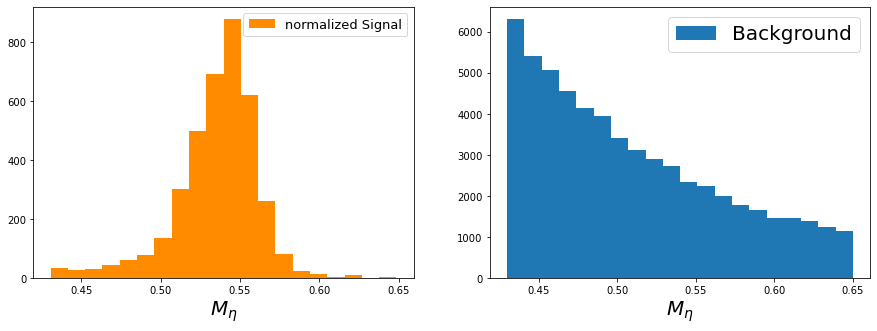

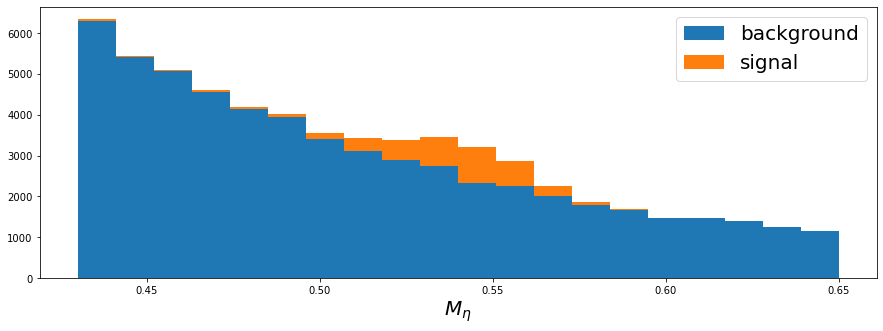

In [14]:
# data invariant mass of eta signal (signal + peaking background)
data_sig = eta_sig_InvM.dropna()
data_bkg = eta_bkg_InvM.dropna()

# plot the histogram
plt.figure(figsize=(15,5))
plt.subplot(121)
counts_sig, edges, _ = plt.hist(data_sig, bins=20, label='normalized Signal', color='darkorange')
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize=13)

plt.subplot(122)
counts_bkg, edges, _ = plt.hist(data_bkg, bins=20, label='Background')
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize=20)

plt.figure(figsize=(15,5))
counts, edges, _ = plt.hist([data_bkg, data_sig], bins=20, label=['background', 'signal'], histtype='barstacked')
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize=20)

# making the size of x and y data the same
y_data = counts[0]+(counts[1]-counts[0])
x_data = (edges[:-1] + edges[1:]) / 2


## How many signal do we get in this method

It's quit a lot, remember I didn't consider the best candidate here

In [15]:
# how many signal enteries do we have
np.sum(counts[1]-counts[0]), len(data_sig)

(3818.0, 3818)

##### There was a problem in the way I defined signal because I reconstructed seperately and asked for generated mode seperately sometimes the I took the wrong B what I meant is that I reconstructed B0 as $D\eta l\nu$ but B1 was actully generated $D\eta l\nu$

In [16]:
pd.set_option('display.max_columns', 907)
# charged
# check for signal if the same B reconstructd as Detalnu generated as Detalnu
c = dfp[
    ( (dfp['B0_decayModeID']<500) & (abs(dfp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
    |
    ( (dfp['B1_decayModeID']<500) & (dfp['aBplusMode']%10000).isin([1019,1020,1039,1040]) )
]

c.loc['signal']

__experiment__  __run__  __event__  __production__  \
gen_charged 3772              1003        0   16764827           24816   
            3778              1003        0   16764827           24816   
            7562              1003        0   29668431           24816   
            8866              1003        0   40398370           24816   
            8868              1003        0   40398370           24816   
...                            ...      ...        ...             ...   
            786208            1003        0   24311593           24820   
            786209            1003        0   24311593           24820   
            786210            1003        0   24311593           24820   
            787806            1003        0   29878168           24820   
            787807            1003        0   29878168           24820   

                    __candidate__  __ncandidates__  __weight__       Ecms  \
gen_charged 3772                2                9         1.0  10.579557   
            3778                8                9         1.0  10.579557   
            7562                8                9         1.0  10.579557   
            8866                0                9         1.0  10.579557   
            8868                2                9         1.0  10.579557   
...                           ...              ...         ...        ...   
            786208              0                9         1.0  10.579557   
            786209              1                9         1.0  10.579557   
            786210              2                9         1.0  10.579557   
            787806              4                9         1.0  10.579557   
            787807              5                9         1.0  10.579557   

                    aBminusMode  aBplusMode  aB0Mode  aBbar0Mode  \
gen_charged 3772        -1002.0      1040.0    -99.0       -99.0   
            3778        -1002.0      1040.0    -99.0       -99.0   
            7562        -1019.0      1021.0    -99.0       -99.0   
            8866        -1040.0    101001.0    -99.0       -99.0   
            8868        -1040.0    101001.0    -99.0       -99.0   
...                         ...         ...      ...         ...   
            786208      -1039.0      1001.0    -99.0       -99.0   
            786209      -1039.0      1001.0    -99.0       -99.0   
            786210      -1039.0      1001.0    -99.0       -99.0   
            787806      -1002.0    101019.0    -99.0       -99.0   
            787807      -1002.0    101019.0    -99.0       -99.0   

                    aDstminusMode  aDstplusMode  aDminusMode  aDplusMode  \
gen_charged 3772            -99.0         -99.0        -99.0       -99.0   
            3778            -99.0         -99.0        -99.0       -99.0   
            7562            -99.0         -99.0        -99.0       -99.0   
            8866            -99.0         -99.0        -99.0       -99.0   
            8868            -99.0         -99.0        -99.0       -99.0   
...                           ...           ...          ...         ...   
            786208          -99.0         -99.0        -99.0       -99.0   
            786209          -99.0         -99.0        -99.0       -99.0   
            786210          -99.0         -99.0        -99.0       -99.0   
            787806          -99.0         -99.0        -99.0       -99.0   
            787807          -99.0         -99.0        -99.0       -99.0   

                     aD0Mode  aDbar0Mode       ECM       pCM      InvM  \
gen_charged 3772    101017.0     -1032.0  8.870992  1.211343  8.786463   
            3778    101017.0     -1032.0  8.853800  1.264598  8.761453   
            7562      1010.0     -1036.0  8.019733  1.466358  7.885585   
            8866      1017.0     -1038.0  8.975946  1.105870  8.907717   
            8868      1017.0     -1038.0  9.123243  1.124581  9.053838   
...                      ...    

In [17]:
# charged
# check for ***peaking background*** if the same B reconstructd as Detalnu generated as Detalnu
p = dfp.loc['peaking background'][
    ((dfp.loc['peaking background']['B0_decayModeID']<500) & (dfp.loc['peaking background']['aB0Mode']%10000).isin([1017,1018,1035,1036]))
    |
    ((dfp.loc['peaking background']['B1_decayModeID']<500) & (abs(dfp.loc['peaking background']['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]))
]
p

__experiment__  __run__  __event__  __production__  \
gen_mixed 57388             1003        0    2434241           24821   
          57389             1003        0    2434241           24821   
          57390             1003        0    2434241           24821   
          57391             1003        0    2434241           24821   
          57392             1003        0    2434241           24821   
          123054            1003        0   75938256           24822   
          123056            1003        0   75938256           24822   
          123062            1003        0   75938256           24822   
          156638            1003        0   61010233           24822   
          174228            1003        0   30650282           24823   
          269281            1003        0   58359250           24824   
          269283            1003        0   58359250           24824   
          269284            1003        0   58359250           24824   
          269288            1003        0   58359250           24824   
          286556            1003        0   60744873           24824   

                  __candidate__  __ncandidates__  __weight__       Ecms  \
gen_mixed 57388               0                9         1.0  10.579557   
          57389               1                9         1.0  10.579557   
          57390               2                9         1.0  10.579557   
          57391               3                9         1.0  10.579557   
          57392               4                9         1.0  10.579557   
          123054              0                9         1.0  10.579557   
          123056              2                9         1.0  10.579557   
          123062              8                9         1.0  10.579557   
          156638              0                1         1.0  10.579557   
          174228              1                9         1.0  10.579557   
          269281              0                9         1.0  10.579557   
          269283              2                9         1.0  10.579557   
          269284              3                9         1.0  10.579557   
          269288              7                9         1.0  10.579557   
          286556              0                1         1.0  10.579557   

                  aBminusMode  aBplusMode   aB0Mode  aBbar0Mode  \
gen_mixed 57388         -99.0       -99.0    1018.0     -1019.0   
          57389         -99.0       -99.0    1018.0     -1019.0   
          57390         -99.0       -99.0    1018.0     -1019.0   
          57391         -99.0       -99.0    1018.0     -1019.0   
          57392         -99.0       -99.0    1018.0     -1019.0   
          123054        -99.0       -99.0  101001.0     -1035.0   
          123056        -99.0       -99.0  101001.0     -1035.0   
          123062        -99.0       -99.0  101001.0     -1035.0   
          156638        -99.0       -99.0    1017.0     -1003.0   
          174228        -99.0       -99.0  101017.0     -1001.0   
          269281        -99.0       -99.0  101006.0   -201018.0   
          269283        -99.0       -99.0  101006.0   -201018.0   
          269284        -99.0       -99.0  101006.0   -201018.0   
          269288        -99.0       -99.0  101006.0   -201018.0   
          286556        -99.0       -99.0    1019.0   -101018.0   

                  aDstminusMode  aDstplusMode  aDminusMode  aDplusMode  \
gen_mixed 57388         -1001.0        1001.0        -99.0       -99.0   
          57389         -1001.0        1001.0        -99.0       -99.0   
          57390         -1001.0        1001.0        -99.0       -99.0   
          57391         -1001.0        1001.0        -99.0       -99.0   
          57392         -1001.0        1001.0        -99.0       -99.0   
          123054        -1002.0         -99.0      -1033.0      1001.0   
          123056        -1002.0         -99.0      -1033.0      1001.0   

In [18]:
# mixed
# check for signal if the same B reconstructd as Detalnu generated as Detalnu
n = df0[
    ((df0['B0_decayModeID']<500) & (abs(df0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]))
    |
    ((df0['B1_decayModeID']<500) & (df0['aB0Mode']%10000).isin([1017,1018,1035,1036]))
]
n.loc['signal']

__experiment__  __run__  __event__  __production__  \
gen_mixed 1929              1003        0   25578865           24821   
          4665              1003        0   17894749           24821   
          5867              1003        0   33901681           24821   
          20042             1003        0   19883881           24821   
          25865             1003        0   39616645           24821   
...                          ...      ...        ...             ...   
          423519            1003        0   14621674           24825   
          427433            1003        0   72824308           24825   
          427847            1003        0   87835928           24825   
          427848            1003        0   87835928           24825   
          427855            1003        0   87835928           24825   

                  __candidate__  __ncandidates__  __weight__       Ecms  \
gen_mixed 1929                0                1         1.0  10.579557   
          4665                2                4         1.0  10.579557   
          5867                5                8         1.0  10.579557   
          20042               2                9         1.0  10.579557   
          25865               0                8         1.0  10.579557   
...                         ...              ...         ...        ...   
          423519              3                7         1.0  10.579557   
          427433              0                2         1.0  10.579557   
          427847              0                9         1.0  10.579557   
          427848              1                9         1.0  10.579557   
          427855              8                9         1.0  10.579557   

                  aBminusMode  aBplusMode   aB0Mode  aBbar0Mode  \
gen_mixed 1929          -99.0       -99.0    1019.0     -1035.0   
          4665          -99.0       -99.0    1017.0   -101003.0   
          5867          -99.0       -99.0  101001.0     -1018.0   
          20042         -99.0       -99.0    1019.0     -1036.0   
          25865         -99.0       -99.0    1017.0    101002.0   
...                       ...         ...       ...         ...   
          423519        -99.0       -99.0    1003.0     -1017.0   
          427433        -99.0       -99.0  101019.0     -1018.0   
          427847        -99.0       -99.0  101017.0    101001.0   
          427848        -99.0       -99.0  101017.0    101001.0   
          427855        -99.0       -99.0  101017.0    101001.0   

                  aDstminusMode  aDstplusMode  aDminusMode  aDplusMode  \
gen_mixed 1929          -1001.0         -99.0        -99.0      1033.0   
          4665            -99.0        1002.0      -1033.0      1033.0   
          5867          -1001.0        1001.0        -99.0       -99.0   
          20042         -1002.0        1001.0      -1033.0       -99.0   
          25865           -99.0         -99.0      -1025.0       -99.0   
...                         ...           ...          ...         ...   
          423519          -99.0         -99.0        -99.0      1033.0   
          427433        -1001.0        1001.0        -99.0       -99.0   
          427847        -1001.0         -99.0      -1066.0       -99.0   
          427848        -1001.0         -99.0      -1066.0       -99.0   
          427855        -1001.0         -99.0      -1066.0       -99.0   

                  aD0Mode  aDbar0Mode       ECM       pCM      InvM   cosThCM  \
gen_mixed 1929      -99.0     -1017.0  9.140312  0.950611  9.094776 -0.255689   
          4665      -99.0       -99.0  7.437908  0.725203  7.402852 -0.154403   
          5867     1036.0     -1046.0  8.820972  0.712034  8.796838 -0.603585   
          20042    1032.0       -99.0  8.558748  1.406903  8.442979 -0.820413   
          25865     -99.0       -99.0  9.471390  1.116947  9.414472  0.816284   
...                   ...         ...       ...       ...       ...     

In [19]:
# mixed
# check for ***peaking background*** if the same B reconstructd as Detalnu generated as Detalnu
p0 = df0.loc['peaking background'][
    ((df0.loc['peaking background']['B0_decayModeID']<500) & (df0.loc['peaking background']['aB0Mode']%10000).isin([1017,1018,1035,1036]))
    |
    ((df0.loc['peaking background']['B1_decayModeID']<500) & (abs(df0.loc['peaking background']['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]))
]
p0

Empty DataFrame
Columns: [__experiment__, __run__, __event__, __production__, __candidate__, __ncandidates__, __weight__, Ecms, aBminusMode, aBplusMode, aB0Mode, aBbar0Mode, aDstminusMode, aDstplusMode, aDminusMode, aDplusMode, aD0Mode, aDbar0Mode, ECM, pCM, InvM, cosThCM, phiCM, PDG, nROE_Ch, nROE_ECL, nROE_KL, nROE_gam, Q_ROE, M_ROE, Eextra_ROE, R2, cosTBTO, M_roepi0, pCM_roepi0, phiCM_roepi0, cosThCM_roepi0, ECM_roegam, phiCM_roegam, cosThCM_roegam, pCM_roepi, phiCM_roepi, cosThCM_roepi, q_roepi, isSignal, Y4Sprod, Y4Sproduct, Y4SScore, Y4SScore4, decayModeID, cosBY0, cosBY1, cosDel, cosDelRange, B0_ECM, B0_pCM, B0_InvM, B0_cosThCM, B0_phiCM, B0_PDG, B0_BchiProb, B0_BflightDistance, B0_BflightDistanceErr, B0_B_dr, B0_B_dz, B0_B_x, B0_B_y, B0_B_z, B0_B_x_uncertainty, B0_B_y_uncertainty, B0_B_z_uncertainty, B0_isSignal, B0_mcErrors, B0_mcPDG, B0_genMotherID_0, B0_genMotherPDG_0, B0_genMotherPDG_1, B0_isSignalAcceptMissing, B0_decayModeID, B0_cosBY, B0_Pi0orEtaScore, B1_ECM, B1_pCM, B1_InvM, B1_cosThCM, B1_phiCM, B1_PDG, B1_BchiProb, B1_BflightDistance, B1_BflightDistanceErr, B1_B_dr, B1_B_dz, B1_B_x, B1_B_y, B1_B_z, B1_B_x_uncertainty, B1_B_y_uncertainty, B1_B_z_uncertainty, B1_isSignal, B1_mcErrors, ...]
Index: []

In [20]:
# checking by combinig df0 and dfp the index like signal will be correctly attached together
len(dfp.loc['signal']), len(df0.loc['signal']), len(df.loc['signal'])

(2187, 488, 2675)

/Users/sahargholipour/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


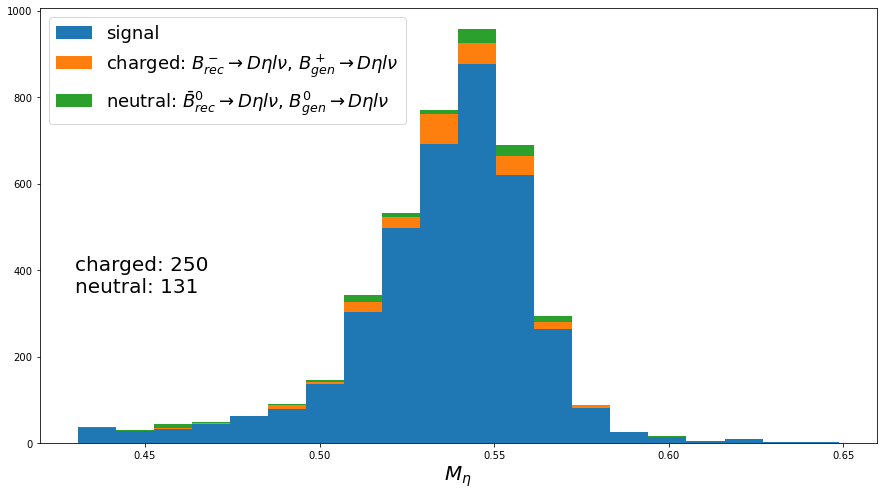

In [21]:
# checking how many of signals were taken as signal by mistake, because I didn't specify which B should be generated as Detalnu
# aparantly some of B which have been generated as Detalnu were reconstructed as Dlnu
sig_pkbkg = df.drop(index = 'combinatorial background').reset_index(drop=True)

eta_InvM_sig = pd.concat([sig_pkbkg['pi4_B0_InvM'], sig_pkbkg['pi4_B1_InvM']]).dropna()

problem_charged = pd.concat(
    [
        sig_pkbkg[(sig_pkbkg['B0_decayModeID']<500) & (abs(sig_pkbkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])]['pi4_B1_InvM']
        ,
        sig_pkbkg[(sig_pkbkg['B1_decayModeID']<500) & (sig_pkbkg['aBplusMode']%10000).isin([1019,1020,1039,1040])]['pi4_B0_InvM']
    ]
).dropna()

problem_neutral = pd.concat(
    [
        sig_pkbkg[(sig_pkbkg['B0_decayModeID']<500) & (abs(sig_pkbkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])]['pi4_B1_InvM']
        ,
        sig_pkbkg[(sig_pkbkg['B1_decayModeID']<500) & (sig_pkbkg['aB0Mode']%10000).isin([1017,1018,1035,1036])]['pi4_B0_InvM']
    ]
).dropna()

plt.figure(figsize=(15, 8))
c, e, _ = plt.hist([eta_InvM_sig, problem_charged, problem_neutral], bins=20, histtype='barstacked', label=['signal', r'charged: $B_{rec}^-\rightarrow D\eta l\nu$, $B_{gen}^+\rightarrow D\eta l\nu$', r'neutral: $\bar{B}_{rec}^0\rightarrow D\eta l\nu$, $B_{gen}^0\rightarrow D\eta l\nu$'])
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.text(0.43,350, f'charged: {len(problem_charged)} \nneutral: {len(problem_neutral)}', fontsize=20)
plt.legend(fontsize=18, loc='upper left')

# Checking if the function still has the same problem of taking the wrong signal
### Ex. B0 is reconstructed as $D\eta l \nu$ but the B1 is generated as $D\eta l\nu$ and I took it as signal

In [22]:
# slitting the data using the function that I defined
dfp_eta_func, rec_modep_eta, gen_modep_eta = sig_bkg_spliter('rec_charged','eta', data)
df0_eta_func, rec_mode0_eta, gen_mode0_eta = sig_bkg_spliter('rec_mixed','eta', data)
df_eta_func = pd.concat([dfp_eta_func, df0_eta_func])

## Check if there's a duplicates

In [23]:
duplicates = df_eta_func.duplicated()
df_eta_func[duplicates]
# in case there was duplicates
# df_eta_func_noduplicates = df_eta_func.drop_duplicates()

Empty DataFrame
Columns: [__experiment__, __run__, __event__, __production__, __candidate__, __ncandidates__, __weight__, Ecms, aBminusMode, aBplusMode, aB0Mode, aBbar0Mode, aDstminusMode, aDstplusMode, aDminusMode, aDplusMode, aD0Mode, aDbar0Mode, ECM, pCM, InvM, cosThCM, phiCM, PDG, nROE_Ch, nROE_ECL, nROE_KL, nROE_gam, Q_ROE, M_ROE, Eextra_ROE, R2, cosTBTO, M_roepi0, pCM_roepi0, phiCM_roepi0, cosThCM_roepi0, ECM_roegam, phiCM_roegam, cosThCM_roegam, pCM_roepi, phiCM_roepi, cosThCM_roepi, q_roepi, isSignal, Y4Sprod, Y4Sproduct, Y4SScore, Y4SScore4, decayModeID, cosBY0, cosBY1, cosDel, cosDelRange, B0_ECM, B0_pCM, B0_InvM, B0_cosThCM, B0_phiCM, B0_PDG, B0_BchiProb, B0_BflightDistance, B0_BflightDistanceErr, B0_B_dr, B0_B_dz, B0_B_x, B0_B_y, B0_B_z, B0_B_x_uncertainty, B0_B_y_uncertainty, B0_B_z_uncertainty, B0_isSignal, B0_mcErrors, B0_mcPDG, B0_genMotherID_0, B0_genMotherPDG_0, B0_genMotherPDG_1, B0_isSignalAcceptMissing, B0_decayModeID, B0_cosBY, B0_Pi0orEtaScore, B1_ECM, B1_pCM, B1_InvM, B1_cosThCM, B1_phiCM, B1_PDG, B1_BchiProb, B1_BflightDistance, B1_BflightDistanceErr, B1_B_dr, B1_B_dz, B1_B_x, B1_B_y, B1_B_z, B1_B_x_uncertainty, B1_B_y_uncertainty, B1_B_z_uncertainty, B1_isSignal, B1_mcErrors, ...]
Index: []

/Users/sahargholipour/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


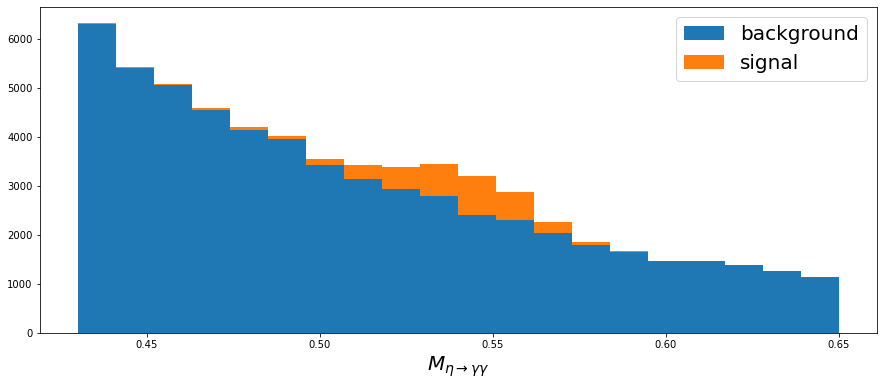

In [24]:
# taking signal and background, signal is signal and the peaking background
eta_sig_func = df_eta_func.drop(index='combinatorial background').reset_index(drop=True)
eta_bkg_func = df_eta_func.loc['combinatorial background']

# combining the invariant mass of gamma gamma coming from both B0 and B1
eta_InvM_sig_func = pd.concat([eta_sig_func['pi4_B0_InvM'], eta_sig_func['pi4_B1_InvM']]).dropna()
eta_InvM_bkg_func = pd.concat([eta_bkg_func['pi4_B0_InvM'], eta_bkg_func['pi4_B1_InvM']]).dropna()

# plotting signal and background using my function
plt.figure(figsize=(15,6))
eta_count_InvM_func, eta_edge_InvM_func, _ = plt.hist([eta_InvM_bkg_func,eta_InvM_sig_func], histtype='barstacked', bins=20, label=['background', 'signal'])
plt.xlabel(r'$M_{\eta \rightarrow \gamma\gamma}$', fontdict=form_label)
plt.legend(fontsize=20)

Bellow shows that the difference between after correction and before correction(360) is not the same as number of times that we made a mistake(368), seems like still we made mistake in the function 8 times.

In [25]:
# how many signal enteries do we have
print(np.sum(eta_count_InvM_func[1]-eta_count_InvM_func[0]))
# how many times we made a mistake
print(f'''the difference between after correction and before correction: {abs(np.sum(eta_count_InvM_func[1]-eta_count_InvM_func[0])-np.sum(counts[1]-counts[0]))}
the number of times that we madee a mistake: {243+125}''')

3458.0
the difference between after correction and before correction: 360.0
the number of times that we madee a mistake: 368


In [26]:
# charged
# using the function for charged Bs to see if still the problem exist even after the correction to the function
c1 = dfp_eta_func[
    ( (dfp_eta_func['B0_decayModeID']<500) & (abs(dfp_eta_func['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
    |
    ( (dfp_eta_func['B1_decayModeID']<500) & (dfp_eta_func['aBplusMode']%10000).isin([1019,1020,1039,1040]) )
]

c1

__experiment__  __run__  \
signal                   gen_charged 678207            1003        0   
                                     678208            1003        0   
                                     678209            1003        0   
                                     678211            1003        0   
                                     678212            1003        0   
...                                                     ...      ...   
combinatorial background gen_charged 786215            1003        0   
                                     787806            1003        0   
                                     787807            1003        0   
                                     787808            1003        0   
                                     787809            1003        0   

                                             __event__  __production__  \
signal                   gen_charged 678207   37014035           24820   
                                     678208   37014035           24820   
                                     678209   37014035           24820   
                                     678211   37014035           24820   
                                     678212   37014035           24820   
...                                                ...             ...   
combinatorial background gen_charged 786215   24311593           24820   
                                     787806   29878168           24820   
                                     787807   29878168           24820   
                                     787808   29878168           24820   
                                     787809   29878168           24820   

                                             __candidate__  __ncandidates__  \
signal                   gen_charged 678207              0                9   
                                     678208              1                9   
                                     678209              2                9   
                                     678211              4                9   
                                     678212              5                9   
...                                                    ...              ...   
combinatorial background gen_charged 786215              7                9   
                                     787806              4                9   
                                     787807              5                9   
                                     787808              6                9   
                                     787809              7                9   

                                             __weight__       Ecms  \
signal                   gen_charged 678207         1.0  10.579557   
                                     678208         1.0  10.579557   
                                     678209         1.0  10.579557   
                                     678211         1.0  10.579557   
                                     678212         1.0  10.579557   
...                                                 ...        ...   
combinatorial background gen_charged 786215         1.0  10.579557   
                                     787806         1.0  10.579557   
                                     787807         1.0  10.579557   
                                     787808         1.0  10.579557   
                                     787809         1.0  10.579557   

                                             aBminusMode  aBplusMode  aB0Mode  \
signal                   gen_charged 678207      -1039.0      1020.0    -99.0   
                                     678208      -1039.0      1020.0    -99.0   
                                     678209      -1039.0      1020.0    -99.0   
                                     678211      -1039.0      1020.0    -99.0   
                                     678212      -1039.0      1020.0    -99.0   
...            

In [27]:
len(c1.loc['signal'])

8

In [28]:
# using the function for mixed Bs
n1 = df0_eta_func[
    ((df0_eta_func['B0_decayModeID']<500) & (abs(df0_eta_func['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]))
    |
    ((df0_eta_func['B1_decayModeID']<500) & (df0_eta_func['aB0Mode']%10000).isin([1017,1018,1035,1036]))
]
n1

__experiment__  __run__  __event__  \
combinatorial background gen_mixed 1929              1003        0   25578865   
                                   2046              1003        0   36561766   
                                   4665              1003        0   17894749   
                                   5867              1003        0   33901681   
                                   20042             1003        0   19883881   
...                                                   ...      ...        ...   
                                   427847            1003        0   87835928   
                                   427848            1003        0   87835928   
                                   427849            1003        0   87835928   
                                   427854            1003        0   87835928   
                                   427855            1003        0   87835928   

                                           __production__  __candidate__  \
combinatorial background gen_mixed 1929             24821              0   
                                   2046             24821              1   
                                   4665             24821              2   
                                   5867             24821              5   
                                   20042            24821              2   
...                                                   ...            ...   
                                   427847           24825              0   
                                   427848           24825              1   
                                   427849           24825              2   
                                   427854           24825              7   
                                   427855           24825              8   

                                           __ncandidates__  __weight__  \
combinatorial background gen_mixed 1929                  1         1.0   
                                   2046                  4         1.0   
                                   4665                  4         1.0   
                                   5867                  8         1.0   
                                   20042                 9         1.0   
...                                                    ...         ...   
                                   427847                9         1.0   
                                   427848                9         1.0   
                                   427849                9         1.0   
                                   427854                9         1.0   
                                   427855                9         1.0   

                                                Ecms  aBminusMode  aBplusMode  \
combinatorial background gen_mixed 1929    10.579557        -99.0       -99.0   
                                   2046    10.579557        -99.0       -99.0   
                                   4665    10.579557        -99.0       -99.0   
                                   5867    10.579557        -99.0       -99.0   
                                   20042   10.579557        -99.0       -99.0   
...                                              ...          ...         ...   
                                   427847  10.579557        -99.0       -99.0   
                                   427848  10.579557        -99.0       -99.0   
                                   427849  10.579557        -99.0       -99.0   
                                   427854  10.579557        -99.0       -99.0   
                                   427855  10.579557        -99.0       -99.0   

                                            aB0Mode  aBbar0Mode  \
combinatorial background gen_mixed 1929      1019.0     -1035.0   
                                   2046      1002.0     -1036.0   
                                   4665      1017.0   -101003.0   
                           

## Seems like in charged B we still have this problem, why?
<font color='blue'>The reason is that I didn't pick the best candidate

The idea is that I will split the data-set into different groups based on event, so each event  with all entries will be one group, and for the best candidate I will take the first candidate in each group which is the minimum value of variable `__candidate__`. Plus I'll take the average of the rest in each group as background because they're not the best candidate.

In [29]:
# I dropped combinatorial background from the whole data set (charged and mixed)
# but all will be charged because we didn't have the same problem with mixed Bs
eta_sig_func = df_eta_func.drop(index = 'combinatorial background').reset_index(drop=True)

/Users/sahargholipour/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [30]:
# now I split the data-set into different groups
eta_sig_grouped = eta_sig_func.groupby(['__event__'])

# let's check how many groups we get, also what's the length of event will all duplicated values
print(f'number of groups: {len(eta_sig_grouped)} \nlength of event variable (including the duplicated values): {len(eta_sig_func["__event__"])}')

number of groups: 1523 
length of event variable (including the duplicated values): 3458


### First let's look at the min value of `__candidate__` for each group
But here it will only give me the `__event__` number and the `__candidate__`

In [31]:
# reset_index() will give us a table including the event and candidate
mincand = eta_sig_grouped['__candidate__'].min().reset_index()
mincand

__event__  __candidate__
0         45823              2
1        173299              1
2        336856              0
3        440042              1
4        451012              1
...         ...            ...
1518  107461660              0
1519  107785543              1
1520  107896696              0
1521  107908756              0
1522  107926492              0

[1523 rows x 2 columns]

### Below it keeps all the columns and finds the row with the minimum `__candidate__` value as the best candidate, and take the rest as nobest candidaet.
<font color='blue'>Note: signal here includes both best and not best candidates.

<font color='blue'>Note: there are duplicates in the no best candidate data-set. So I should groupby it again (for no best candidate).

In [32]:
# the whole data set with best candidate(minmum value for __candidate__)
eta_sig_bestcan, eta_sig_nobestcan = mincand_eachevent(eta_sig_func)

display(Latex(rf'''
Length of $\eta_{{signal}}$ best candidate: {len(eta_sig_bestcan['__candidate__'])}$\\$
Length of $\eta_{{signal}}$ no best candidate (with duplicates): {len(eta_sig_nobestcan['__candidate__'])}$\\$
Length of both best and no best candidate $\eta_{{signal}}$ groups (with duplicates): {len(eta_sig_bestcan['__candidate__']) + len(eta_sig_nobestcan['__candidate__'])}
'''
))

<IPython.core.display.Latex object>

### Looking at the $M_{\eta_{signal} \rightarrow \gamma\gamma}$ for best candidate and nobest candidate for each group (no duplicate)

In [33]:
# Note: I didn't group best candidate bc from each group I picked the first one,
# so splitting to different groups is not needed.
# Therefore, the length of M_eta best candidate and data grouped by event are the same

eta_sig_InvM_bestcan = pd.concat([
    eta_sig_bestcan['pi4_B0_InvM'], eta_sig_bestcan['pi4_B1_InvM']
]).dropna()

eta_sig_nobestcan_grouped = eta_sig_nobestcan.groupby(['__event__'])
eta_sig_InvM_nobestcan = pd.concat([
    eta_sig_nobestcan_grouped['pi4_B0_InvM'].mean(),
    eta_sig_nobestcan_grouped['pi4_B1_InvM'].mean()
]).dropna()

#### Let's look at the length of best and nobest candidate groups (no doplicates)
Based on what we see bellow for nobest candidates in some events one of the entries B0 goes to $D\eta l\nu$ and in the same event another entry goes to $D\eta l\nu$. <font color='blue'>Therefore, as you see after cocating $M_{\eta_{B0}}$ and $M_{\eta_{B1}}$ in number 5, the length is larger than number 3 which the groups of events for no best candidates.</font>

In [34]:
display(Latex(rf'''
1. Length of data grouped by event: {len(eta_sig_grouped)}$\\$
2. Length of $\eta_{{signal}}$ best candidate group (no duplicates): {len(eta_sig_bestcan)}$\\$
3. Length of $\eta_{{signal}}$ nobest candidate group (no duplicates): {len(eta_sig_nobestcan_grouped)}$\\$
4. Length of $M_{{\eta_{{signal}}}}$ best canidate (no duplicates): {len(eta_sig_InvM_bestcan)}$\\$
5. Length of $M_{{\eta_{{signal}}}}$ nobest candidate (no duplicates): {len(eta_sig_InvM_nobestcan)}
'''))

<IPython.core.display.Latex object>

In [35]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    

In [36]:
# I took part of the tables
g_B1 = eta_sig_nobestcan_grouped['pi4_B0_InvM'].mean().dropna().reset_index()
g_B2 = eta_sig_nobestcan_grouped['pi4_B1_InvM'].mean().dropna().reset_index()
display_side_by_side(g_B1.iloc[:10,:], g_B2[:10], titles=[r'No best candidate: $M_{\eta \rightarrow \gamma\gamma}-B0$', r'$M_{\eta \rightarrow \gamma\gamma}-B1$'])

are_event_equal = (g_B1['__event__'].isin(g_B2['__event__'])).sum()
print(f'''
Length of table1 (B0): {len(g_B1)}
Length of table2 (B2): {len(g_B2)}
Number of equal events in these two tables: {are_event_equal}
''')

No best candidate: $M_{\eta \rightarrow \gamma\gamma}-B0$ 
 
 
 
 __event__ 
 pi4_B0_InvM 
 
 
 
 
 0 
 45823 
 0.431690 
 
 
 1 
 336856 
 0.539911 
 
 
 2 
 495154 
 0.520673 
 
 
 3 
 613062 
 0.520374 
 
 
 4 
 654609 
 0.589233 
 
 
 5 
 685978 
 0.549983 
 
 
 6 
 691568 
 0.531972 
 
 
 7 
 1039296 
 0.557796 
 
 
 8 
 1204269 
 0.531410 
 
 
 9 
 1255540 
 0.472017 
 
 
 $M_{\eta \rightarrow \gamma\gamma}-B1$ 
 
 
 
 __event__ 
 pi4_B1_InvM 
 
 
 
 
 0 
 173299 
 0.544676 
 
 
 1 
 440042 
 0.536967 
 
 
 2 
 451012 
 0.547940 
 
 
 3 
 1006332 
 0.509284 
 
 
 4 
 1071549 
 0.558371 
 
 
 5 
 1150921 
 0.512651 
 
 
 6 
 1290775 
 0.538798 
 
 
 7 
 1794316 
 0.522814 
 
 
 8 
 1882422 
 0.547557 
 
 
 9 
 1885904 
 0.577131


Length of table1 (B0): 449
Length of table2 (B2): 487
Number of equal events in these two tables: 28



# Bob's way to rewrite the best candidate

In [37]:
eta_sig_bBestcan = bBest_cand_newcolumn(eta_sig_func)
eta_sig_bBestcan['bBest'].value_counts()

0.0    3115
1.0     126
2.0      64
5.0      41
3.0      34
6.0      26
4.0      24
7.0      18
8.0      10
Name: bBest, dtype: int64

In [38]:
eta_sig_bBestcan.query(mycand)['bBest'].value_counts(), len(eta_sig_bBestcan.query(mycand)['bBest'])

(0.0    815
 1.0     34
 2.0     16
 5.0     14
 3.0     12
 4.0      8
 7.0      7
 6.0      7
 8.0      5
 Name: bBest, dtype: int64,
 918)

In [39]:
eta_sig_bBestcan.query(mycand)['__candidate__'].value_counts()

0    815
1     34
2     16
5     14
3     12
4      8
7      7
6      7
8      5
Name: __candidate__, dtype: int64

As it's shown bellow the length of grouped dataset based on event is the same as the dataset before getting splitted means that in each event we picked only one candidate.

In [40]:
# checking if there's any duplicates in the event, two candidates in the same event
len(eta_sig_bBestcan.query(mycand).groupby(['__event__'])['__candidate__'])

918

# Comparing the bBestcan and bestcan
I plot both to check which candidate will pass each filter

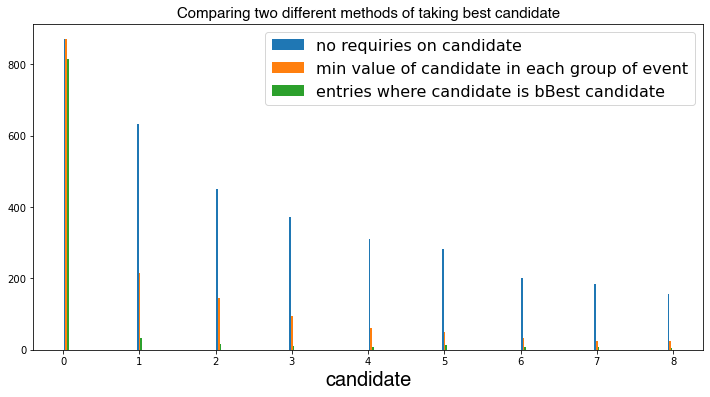

In [41]:
plt.figure(figsize=(12,6))
plt.hist([eta_sig_func['__candidate__'],eta_sig_bestcan['__candidate__'], eta_sig_bBestcan.query(mycand)['__candidate__']], bins=100, label=['no requiries on candidate','min value of candidate in each group of event', 'entries where candidate is bBest candidate'])
plt.title('Comparing two different methods of taking best candidate', fontdict=form_title)
plt.xlabel('candidate', fontdict=form_label)
plt.legend(fontsize=16)

# Let's compare different method of picking best candidate for `signal`

In [42]:
# first candidate from each group of event (as you see above it can even be 8)
eta_sig_InvM_bestcan = eta_sig_InvM_bestcan
# only candidate 0
eta_sig_InvM_cand0 = pd.concat([
    eta_sig_func.query(cand0)['pi4_B0_InvM'], eta_sig_func.query(cand0)['pi4_B1_InvM']
]).dropna()
# bBest candidate
eta_sig_InvM_bBestcan = pd.concat([
    eta_sig_bBestcan.query(mycand)['pi4_B0_InvM'], eta_sig_bBestcan.query(mycand)['pi4_B1_InvM']
]).dropna()


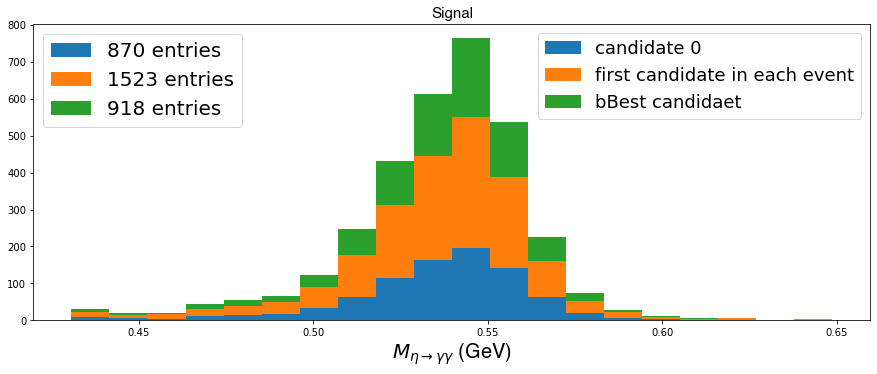

In [43]:
plt.figure(figsize=(15,12))

plt.subplot(211)
count, edges, _ = plt.hist([eta_sig_InvM_cand0, eta_sig_InvM_bestcan, eta_sig_InvM_bBestcan], histtype='barstacked', bins=20,label=['candidate 0', 'first candidate in each event', 'bBest candidaet'])
plt.title('Signal', fontdict=form_title)
plt.xlabel(r'$M_{\eta\rightarrow \gamma\gamma}$ (GeV)', fontdict=form_label)
legend = plt.legend([f'{len(eta_sig_InvM_cand0)} entries', f'{len(eta_sig_InvM_bestcan)} entries', f'{len(eta_sig_InvM_bBestcan)} entries'], loc=2, fontsize=20)
plt.legend(fontsize=18, loc=1)
plt.gca().add_artist(legend)

# Signal and background with different methods of best candidate

In [44]:
# background data
# candidate 0
eta_bkg_cand0 = eta_bkg_func.query(cand0)
# first candidate in each event
eta_bkg_bestcan, eta_bkg_nobestcan= mincand_eachevent(eta_bkg_func)
# bBest candiate
eta_bkg_bBestcan = bBest_cand_newcolumn(eta_bkg_func).query(mycand)

# Invariant mass
# candidate 0
eta_bkg_InvM_cand0 = pd.concat([
    eta_bkg_cand0['pi4_B0_InvM'], eta_bkg_cand0['pi4_B1_InvM']
]).dropna()
# first candidate in each event
eta_bkg_InvM_bestcan = pd.concat([
    eta_bkg_bestcan['pi4_B0_InvM'], eta_bkg_bestcan['pi4_B1_InvM']
]).dropna()
# bBest candidate
eta_bkg_InvM_bBestcan = pd.concat([
    eta_bkg_bBestcan['pi4_B0_InvM'], eta_bkg_bBestcan['pi4_B1_InvM']
]).dropna()

In [45]:
len(eta_bkg_bBestcan), len(eta_bkg_bestcan)

(12173, 19170)

In [46]:
pow(4,0.5)

2.0

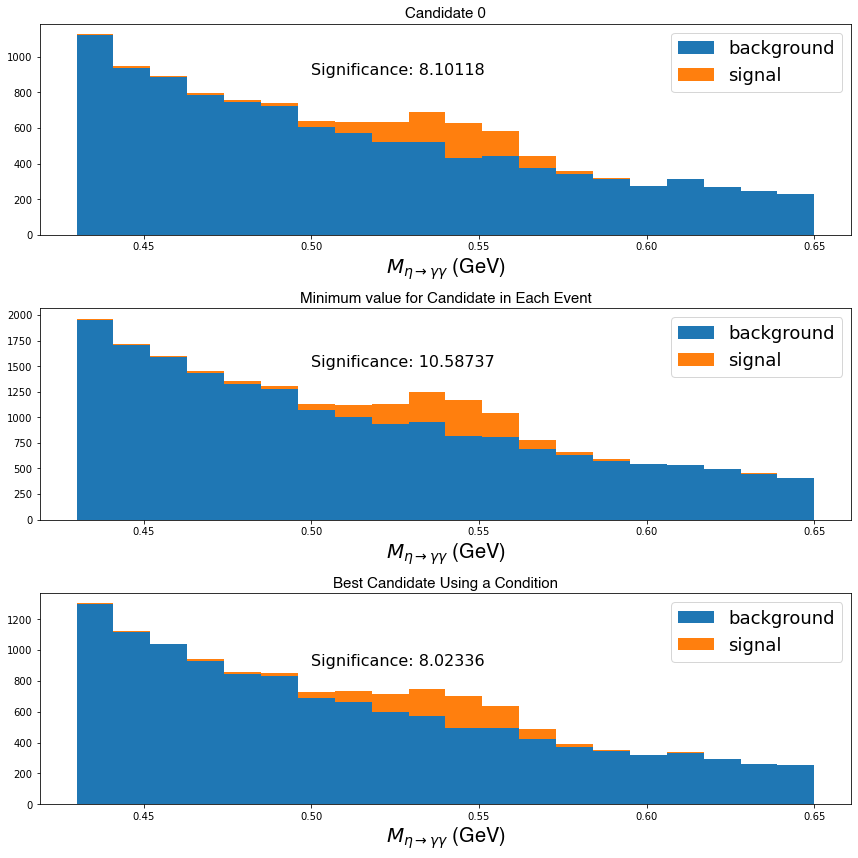

In [47]:
fig,ax = plt.subplots(3,1,figsize=(12,12))

count_cand0, edge_cand0, _ = ax[0].hist([eta_bkg_InvM_cand0, eta_sig_InvM_cand0], bins=20, histtype='barstacked',label=['background','signal'])
ax[0].set_xlabel(r'$M_{\eta\rightarrow \gamma\gamma}$ (GeV)', fontdict=form_label)
ax[0].text(0.5,900,f'Significance: {significance(eta_bkg_InvM_cand0, eta_sig_InvM_cand0):.5f}', fontsize=16)
ax[0].set_title('Candidate 0', fontdict=form_title)
ax[0].legend(fontsize=18)
count_bestcan, edge_bestcan, _ = ax[1].hist([eta_bkg_InvM_bestcan, eta_sig_InvM_bestcan], bins=20, histtype='barstacked',label=['background','signal'])
ax[1].set_xlabel(r'$M_{\eta\rightarrow \gamma\gamma}$ (GeV)', fontdict=form_label)
ax[1].text(0.5,1500,f'Significance: {significance(eta_bkg_InvM_bestcan, eta_sig_InvM_bestcan):.5f}', fontsize=16)
ax[1].set_title('Minimum value for Candidate in Each Event', fontdict=form_title)
ax[1].legend(fontsize=18)
count_bBestcan, edge_bBestcan, _ = ax[2].hist([eta_bkg_InvM_bBestcan, eta_sig_InvM_bBestcan], bins=20, histtype='barstacked',label=['background','signal'])
ax[2].set_xlabel(r'$M_{\eta\rightarrow \gamma\gamma}$ (GeV)', fontdict=form_label)
ax[2].text(0.5,900,f'Significance: {significance(eta_bkg_InvM_bBestcan, eta_sig_InvM_bBestcan):.5f}', fontsize=16)
ax[2].set_title('Best Candidate Using a Condition', fontdict=form_title)
ax[2].legend(fontsize=18)

plt.tight_layout(pad=1.0)

In [183]:
len(eta_bkg_InvM_bestcan), len(eta_sig_InvM_bestcan)

(19170, 1523)

# Fitting with nomalizing and mapping range inside of the fucntion

In [48]:
# Importing the packages
from numpy.polynomial.legendre import Legendre, legval

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.special import legendre

In [71]:
# getting the data
x_data = edge_bestcan
y_data = count_bestcan[0]
len(x_data), len(y_data)

(21, 20)

In [50]:
# check what's the sum of the bin counts
np.sum(y)

19170.0

##### it's a fucntion that gets the inetgral of the legendre function batween -1 and 1

In [60]:
# the point is that you can pass any range of x that you want and it will mapp it to -1 and 1
def leg_integral(x, a, b, c, d):
    center = (np.max(x) + np.min(x)) / 2
    factor = 2 / (np.max(x) - np.min(x))
    x_mapped = ((x - center) * factor)
    
    leg = Legendre([a, b, c, d])
    
    # Define the integrand function as the squared absolute value of the Legendre polynomial
    integrand = lambda x: (1/(2*a))*leg(x)
    
    # Calculate the integral using quad
    integral, error = integrate.quad(integrand, np.min(x_mapped), np.max(x_mapped))
    
    return integral

# Example usage
a, b, c, d = 958.78747056, -745.87187188, 229.97645613, -66.1301391

integral = leg_integral(x, a, b, c, d)
print(integral)

1.0


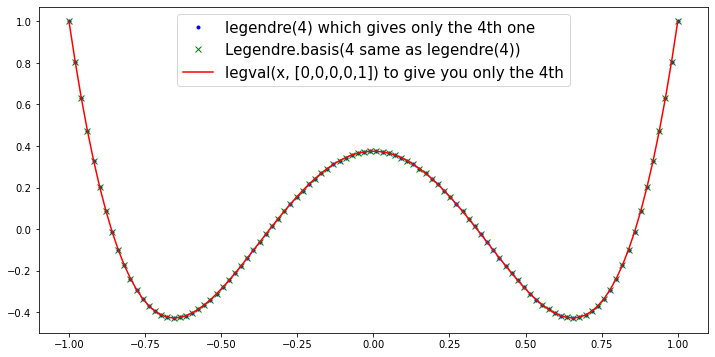

In [70]:
xrange = np.linspace(-1, 1, 100)
leg = legendre(4)
p = leg(xrange)
p1 = legval(xrange, [0, 0, 0, 0, 1])
leg2 = Legendre.basis(4)
p2 = leg2(xrange)
plt.figure(figsize=(12,6))
plt.plot(xrange, p, 'b.', label='legendre(4) which gives only the 4th one')
plt.plot(xrange, p2, 'gx', label='Legendre.basis(4 same as legendre(4))')
plt.plot(xrange, p1, color='r', label='legval(x, [0,0,0,0,1]) to give you only the 4th')
plt.legend(fontsize=15)
plt.show()

Note: Legendre.basis(n) and legendre(n) it only gives you the nth coef of the legendre polynomial

In [68]:
print('it will give you the nth basis: 'Legendre.basis(3)) # same as legendre(3)
print('it will give all until the nth basis: 'Legendre([1, 1, 1, 1])) # same as legval(x, [1, 1, 1, 1])

0.0 + 0.0·P₁(x) + 0.0·P₂(x) + 1.0·P₃(x)
1.0 + 1.0·P₁(x) + 1.0·P₂(x) + 1.0·P₃(x)


# Fitting

## Non normalized legendre function

Note: the coefs here are unique so they don't change by giving random initial guesses.

In [141]:
def legend(x, *coefs, calculate_mp=True, mapping=True):
    a, b, c, d = coefs
    # Fix the value of calculate_middle_point to True
    calculate_mp = lambda x: (x[1:] + x[:-1]) / 2 if calculate_mp else x
    
    x_mapped = x
    if mapping:
        center = (np.max(x) + np.min(x)) / 2
        factor = 2 / (np.max(x) - np.min(x))
        x_mapped = ((x - center) * factor)
    x_mapped = calculate_mp(x_mapped)
    
    leg = Legendre([a, b, c, d])
    
    return leg(x_mapped)

In [145]:
non_norm_popt, non_norm_pcov = curve_fit(legend, x_data, y, p0=[10, 13, 19, 100])
non_norm_popt

array([ 958.78747067, -745.87187212,  229.97645456,  -66.13014404])

##### correlation matrix

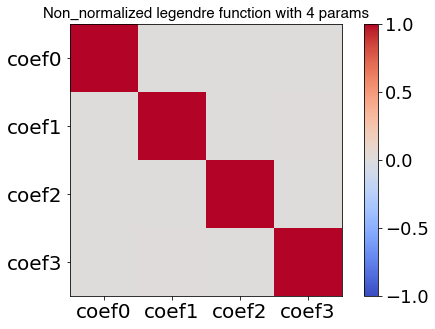

In [176]:
std_devs = np.sqrt(np.diag(non_norm_pcov))
corr_matrix = non_norm_pcov/np.outer(std_devs, std_devs)

param_name = ['coef0', 'coef1', 'coef2', 'coef3']

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(4), param_name, fontsize=20)
plt.yticks(np.arange(4), param_name, fontsize=20)
plt.title('Non_normalized legendre function with 4 params', fontdict=form_title)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.show()

## Normalized legendre but with one less parameter, all divided by coef0

Note: because the coef which was dependent of other coefs has been removed so by giving any random initial guesses for coefs the values of popt doesn't change.

In [135]:
# because the function is normalized
def norm_legend_one_less_param(x, coef1, coef2, coef3, coef0=1, mapping=False, middle=False):
    x_mapped = x
    if mapping:
        center = (np.max(x) + np.min(x)) / 2
        factor = 2 / (np.max(x) - np.min(x))
        x_mapped = ((x - center) * factor)
    if middle:
        x_mapped = (x_mapped[1:] + x_mapped[:-1]) / 2
    
    return 1/(2 * coef0) * legval(x_mapped, [coef0, coef1, coef2, coef3]), x_mapped

In [151]:
popt_less_p, pcov_less_p = curve_fit(lambda x, N, coef1, coef2, coef3: N*norm_legend_one_less_param(x, coef1, coef2, coef3, 1, True, True)[0], x_data, y_data, p0=[1, 100, 30, 1])
popt_less_p

array([ 1.91757494e+03, -7.77932436e-01,  2.39861765e-01, -6.89726795e-02])

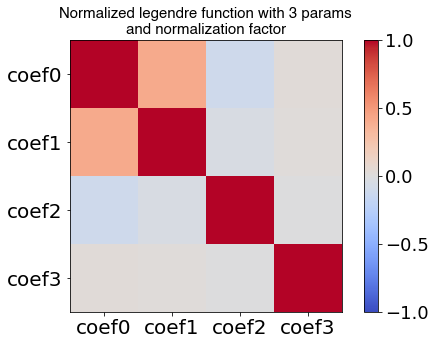

In [177]:
std_devs = np.sqrt(np.diag(pcov_less_p))
corr_matrix = pcov_less_p/np.outer(std_devs, std_devs)

param_name = ['coef0', 'coef1', 'coef2', 'coef3']

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(4), param_name, fontsize=20)
plt.yticks(np.arange(4), param_name, fontsize=20)
plt.title('Normalized legendre function with 3 params\nand normalization factor', fontdict=form_title)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.show()

## Nomalized legendre function with mapping inside

In [124]:
def norm_legend(x, coef0, coef1, coef2, coef3, mapping=False, middle=False):
    x_mapped = x
    if mapping:
        center = (np.max(x) + np.min(x)) / 2
        factor = 2 / (np.max(x) - np.min(x))
        x_mapped = ((x - center) * factor)
    if middle:
        x_mapped = (x_mapped[1:] + x_mapped[:-1]) / 2
    
    return 1/(2 * coef0) * legval(x_mapped, [coef0, coef1, coef2, coef3]), x_mapped

##### Normalizing the bin counts with bin width, y here is number of events per bin width

In [128]:
popt_normy, pcov_normy = curve_fit(lambda x, N, coef0, coef1, coef2, coef3: N*norm_legend(x, coef0, coef1, coef2, coef3, True, True)[0], x_data, y_data/0.1)
popt_normy

array([19175.74940539,  2174.17700926, -1691.36247071,   521.50183706,
        -149.9587752 ])

##### Y here is just number of events

Note: here the coefs will change by chnaging the initial guesses bc the function is normalized but one of the coef is made of other three so they are dependant of each other.

In [153]:
popt, pcov = curve_fit(lambda x, N, coef0, coef1, coef2, coef3: N*norm_legend(x, coef0, coef1, coef2, coef3, True, True)[0], x_data, y_data, p0=[100, 10, 100, 1, 1])
popt

array([1917.57494045,  589.64466197, -458.70369241,  141.43322343,
        -40.66937191])

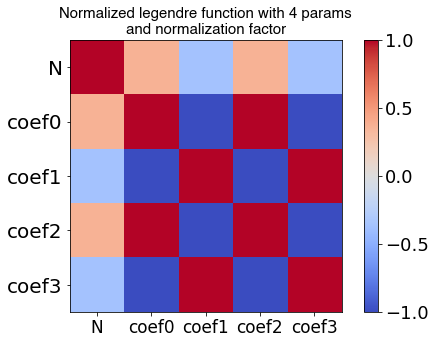

In [182]:
std_devs = np.sqrt(np.diag(pcov))
corr_matrix = pcov/np.outer(std_devs, std_devs)

param_name = ['N','coef0', 'coef1', 'coef2', 'coef3']

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(5), param_name, fontsize=17)
plt.yticks(np.arange(5), param_name, fontsize=20)
plt.title('Normalized legendre function with 4 params\nand normalization factor', fontdict=form_title)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.show()

In [101]:
x_mapp = norm_legend(x_data, *popt[1:], True, True)[1]
print('mapped x range of data: ', x_mapp)
print('length of mapped x range: ', len(x_mapp))
print('bin width: ', x_mapp[1]-x_mapp[0])

mapped x range of data:  [-0.95 -0.85 -0.75 -0.65 -0.55 -0.45 -0.35 -0.25 -0.15 -0.05  0.05  0.15
  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95]
length of mapped x range:  20
bin width:  0.10000000000000009


In [106]:
# Now I ckecked if the value that I get for the number of events from the N value and the actual value agrees
print('divide the value of N from fitting by the bin width: ', popt[0]/(x_mapp[1]-x_mapp[0]))
print('sum of events (sum of y axis): ', np.sum(y))

divide the value of N from fitting by the bin width:  19175.749405910494
sum of events (sum of y axis):  19170.0


In [95]:
(x_mapp[1]+x_mapp[0])/2 (x_mapp[2]+x_mapp[1])/2

(-0.95, -0.8499999999999999)

In [92]:
def middel_point(x):
    x_middle = (x[1:] + x[:-1])/2
    return x_middle

In [98]:
middle_x = middel_point(x_mapp)
middle_x[1]-middle_x[0]

0.10000000000000009

In [100]:
middle_x

array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
        0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [111]:
f, x_f = norm_legend(x, *popt[1:], False, False)

In [112]:
x_f

array([0.43000015, 0.44099963, 0.4519991 , 0.46299857, 0.47399805,
       0.48499752, 0.495997  , 0.50699647, 0.51799595, 0.52899542,
       0.53999489, 0.55099437, 0.56199384, 0.57299332, 0.58399279,
       0.59499226, 0.60599174, 0.61699121, 0.62799069, 0.63899016,
       0.64998964])

In [114]:
popt[0]*f

array([616.36763938, 611.52474235, 606.71239234, 601.92926925,
       597.174053  , 592.44542347, 587.74206057, 583.06264421,
       578.40585428, 573.77037068, 569.15487332, 564.55804209,
       559.97855689, 555.41509764, 550.86634423, 546.33097655,
       541.80767452, 537.29511803, 532.79198698, 528.29696127,
       523.80872081])

In [117]:
np.sum(popt[0]*f)*(x_f[1]-x_f[0])

131.54753823025996

In [119]:
integrate.quad(lambda x: popt[0]*norm_legend(x, popt[1], popt[2], popt[3], False, False)[0], -1, 1)

(1917.5749405910517, 2.1289358504884023e-11)

In [121]:
# no matters what the parameters are so the integral is one bc the func was normalized
integrate.quad(lambda x: norm_legend(x,1, 2, 3, 4, False, False)[0], -1, 1)

(1.0000000000000002, 1.7514412062010794e-14)

In [77]:
# this shows no matters what the coefs are if the function has been normalized correctly the integral should be one
l = [799999999, 50, 6666, 71]
integrate.quad(lambda x: 1/(2*l[0]) * legval(x, l), -1, 1)

(1.0, 1.1102230246251565e-14)

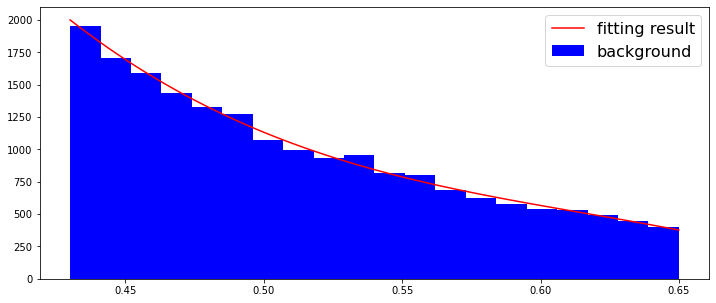

In [201]:
x_val = np.linspace(np.min(x), np.max(x), 100)

plt.figure(figsize=(12,5))
plt.plot(x_val, popt_less_p[0]*norm_legend_one_less_param(x_val, *popt_less_p[1:], True, True)[0], 'r', label='fitting result')
plt.hist(eta_bkg_InvM_bestcan, bins=20, color='blue', label='background')

plt.legend(fontsize=16)
plt.show()

count1 first bin:  1953.0 
count2 first bin:  177553.94205196467


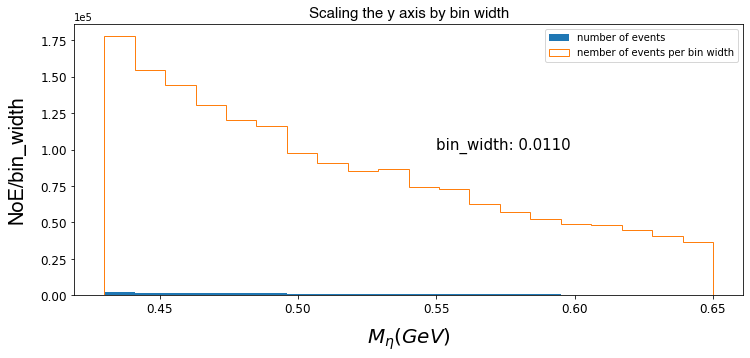

In [257]:
plt.figure(figsize=(12,5))
count1, edge1, _=plt.hist(eta_bkg_InvM_bestcan, label='number of events', bins=20)
count2, edge2, _=plt.hist(eta_bkg_InvM_bestcan, label='nember of events per bin width', weights=np.ones_like(eta_bkg_InvM_bestcan)/(edge1[1]-edge1[0]), histtype='step', bins=20)
print('count1 first bin: ', count1[0], '\ncount2 first bin: ', count2[0])
plt.title('Scaling the y axis by bin width', fontdict=form_title)
plt.xlabel('$M_{\eta} (GeV)$', fontdict=form_label, labelpad=10)
plt.ylabel('NoE/bin_width', fontdict=form_label, labelpad=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(0.55, 100000, f'bin_width: {(edge1[1]-edge1[0]):.4f}', fontsize=15)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend()
plt.show()

In [247]:
count1[0]/(edge1[1]-edge1[0])

177553.9420519705